In [1]:
import pandas as pd
import requests 
import json 
import csv 
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
df_p = pd.read_csv('../data/askphilosophy.csv', index_col=0)
df_c = pd.read_csv('../data/changemyview.csv', index_col=0)

In [3]:
df_p.columns

Index(['subreddit', 'selftext', 'title', 'created_utc'], dtype='object')

In [4]:
df_c['title'] =  df_c['title'].replace(to_replace ='CMV: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='CMC: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='Cmv: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='cmv: ', value = '', regex = True)

In [5]:
 df_c['title'] =  df_c['title'].replace(to_replace ='CMC: ', value = '', regex = True)

In [6]:
 df_c['title']

0     The Nintendo Wii is the best video game consol...
1                                Lawyers rule the world
2     There is not a rationally consistent abortion ...
3     In the Ballad of Buster Scruggs, the quadruple...
4     the majority of posters here have little to no...
                            ...                        
95    Vaccinations should not be trusted without que...
96    The greatest threat facing the current wave of...
97    I no longer believe China was entirely in the ...
98    I lose respect for people who try to pull out ...
99    The spread of racial protests in European coun...
Name: title, Length: 9900, dtype: object

In [7]:
df_c.to_csv("../data/changemyview_fixed.csv")

In [8]:
df = df_c.append(df_p)

In [9]:
df['subreddit'].value_counts(normalize=True)

askphilosophy    0.502513
changemyview     0.497487
Name: subreddit, dtype: float64

In [10]:
# df_all.dropna()
df['title'].isna().sum()

0

In [11]:
df.duplicated().sum()

21

In [12]:
df[df.duplicated()].head(21)

,subreddit,selftext,title,created_utc
13,changemyview,[removed],"In terms of punishment, life in prison is a lo...",1588380383
10,changemyview,[removed],This pandemic is a good opportunity for me to ...,1588732957
31,askphilosophy,Why Joseph's relationship were so ephemeral? D...,"Franz Kafka's ""The Trial"".",1588055762
48,askphilosophy,"On one hand, most criticism appears completely...",Works that discuss aesthetic value and discuss...,1588378949
50,askphilosophy,"On one hand, most criticism appears completely...",Works that discuss aesthetic value and discuss...,1588378950
53,askphilosophy,"On one hand, most criticism appears completely...",Works that discuss aesthetic value and discuss...,1588378952
55,askphilosophy,"On one hand, most criticism appears completely...",Works that discuss aesthetic value and discuss...,1588378980
56,askphilosophy,"On one hand, most criticism appears completely...",Works that discuss aesthetic value and discuss...,1588378980
60,askphilosophy,"On one hand, most criticism appears completely...",Works that discuss aesthetic value and discuss...,1588378983
62,askphilosophy,"On one hand, most criticism appears completely...",Works that discuss aesthetic value and discuss...,1588379049


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(19879, 4)

In [15]:
#X = df.drop(columns='subreddit')
X = df['title']
y = df['subreddit']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2)

In [17]:
cvect = CountVectorizer(stop_words='english', max_features=500)

In [18]:
X_vect = cvect.fit_transform(X)

In [19]:
dtm = pd.DataFrame(X_vect.toarray(), columns=cvect.get_feature_names())

In [20]:
dtm.sum().sort_values(ascending=False).head(130)

people        1538
philosophy    1329
does           995
good           711
life           536
              ... 
feel           130
important      129
term           129
different      129
china          128
Length: 130, dtype: int64

<AxesSubplot:>

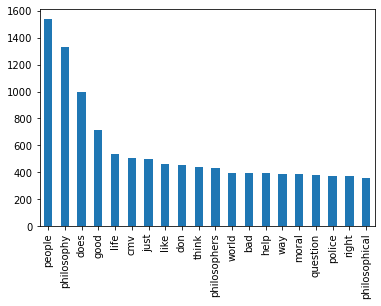

In [21]:
dtm.sum().sort_values(ascending=False).head(20).plot(kind='bar')

In [22]:
cvect_nostop = CountVectorizer(stop_words='english')

In [23]:
X_nostop = cvect_nostop.fit_transform(X)

In [24]:
#function for top words given X_vect, vectorizer
def top_words(X, vect):
    dtm = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
    return dtm.sum().sort_values(ascending = False).head(10)

In [25]:
#examine the results
def bottom_words(X, vect):
    dtm = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
    return dtm.sum().sort_values(ascending = False).tail(10)

In [26]:
top_words(X_nostop, cvect_nostop)

people        1538
philosophy    1329
does           995
good           711
life           536
cmv            510
just           499
like           465
don            454
think          443
dtype: int64

In [27]:
bottom_words(X_nostop, cvect_nostop)

portraying      1
portrait        1
portland        1
expertise       1
expire          1
explainable     1
explaination    1
pork            1
populous        1
kebabs          1
dtype: int64

In [28]:
cvect_ngram = CountVectorizer(stop_words = 'english', max_features = 500, ngram_range=(2, 2))

In [29]:
X_bigram = cvect_ngram.fit_transform(X)

In [30]:
top_words(X_bigram, cvect_ngram)

covid 19            149
united states       116
george floyd        116
police brutality     83
lives matter         81
white people         80
black people         74
social media         74
black lives          71
does mean            56
dtype: int64

In [31]:
bottom_words(X_bigram, cvect_ngram)

science anti             7
say respect              7
conducted new            7
philosophy major         7
philosophy math          7
casual sex               7
cancel culture           7
book recommendation      7
political correctness    7
research conducted       7
dtype: int64